In [38]:
import pandas as pd
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
test_df=pd.read_csv('test.csv')
train_df=pd.read_csv('train.csv')
gender_submission_df=pd.read_csv('gender_submission.csv')

In [40]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
train_df.columns
train_df.shape

(891, 12)

In [42]:
print(train_df.describe())
np.prod(train_df.shape)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


np.int64(10692)

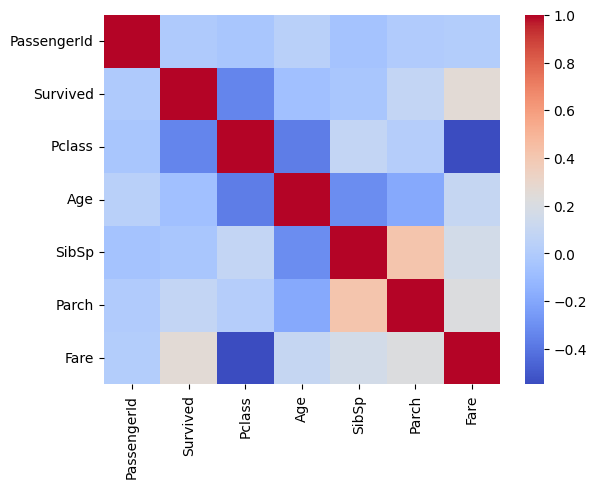

In [43]:
numeric_df = train_df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), cmap='coolwarm')
plt.show()


In [44]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [45]:
train_df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

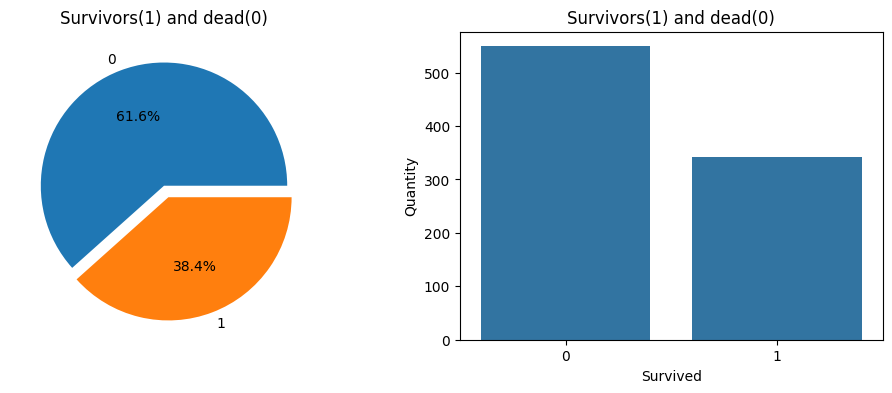

In [46]:
f,ax=plt.subplots(1,2,figsize=(12,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=False)
ax[0].set_title('Survivors(1) and dead(0)')
ax[0].set_ylabel('')
sns.countplot(x='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survivors(1) and dead(0)')
ax[1].set_ylabel('Quantity')
plt.show()

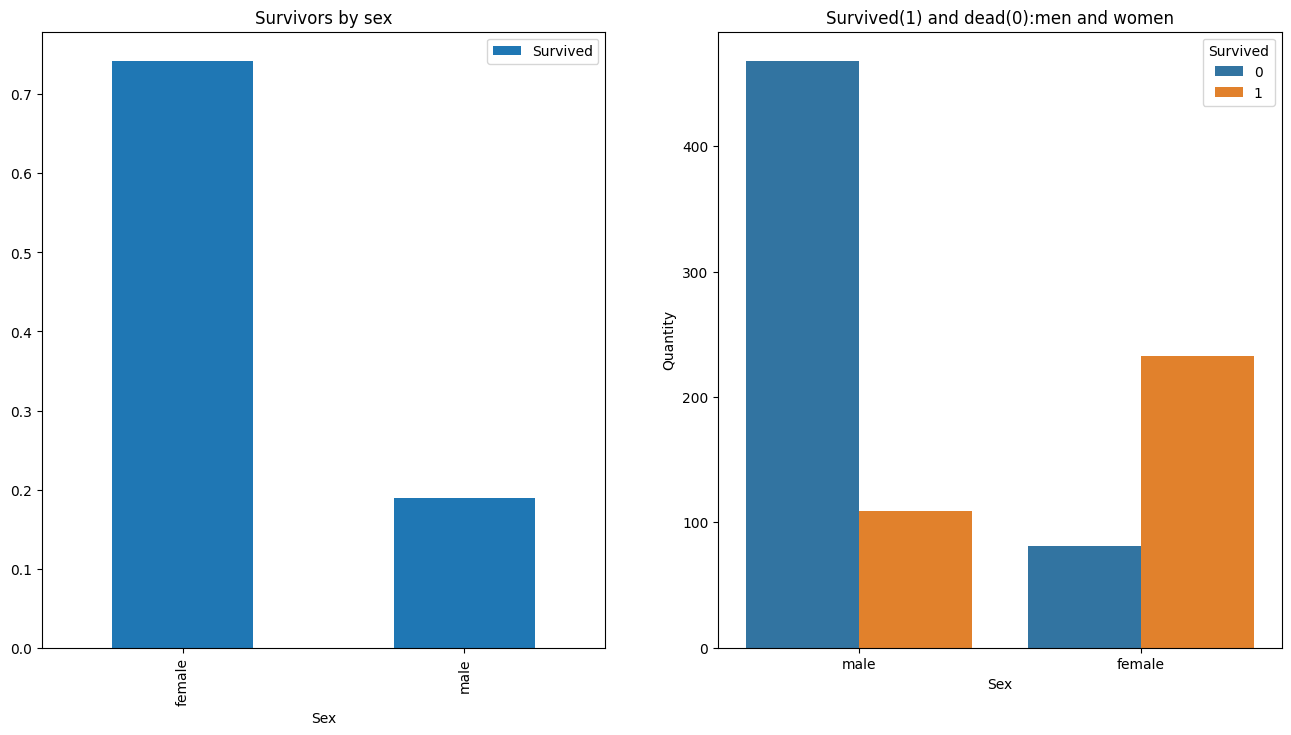

In [47]:
f,ax=plt.subplots(1,2,figsize=(16,8))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivors by sex')
sns.countplot(x='Sex',hue='Survived',data=train_df,ax=ax[1])
ax[1].set_title('Survived(1) and dead(0):men and women')
ax[1].set_ylabel('Quantity')
plt.show()

In [48]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
test_df=test_df.drop(['Ticket','Cabin'],axis=1)

In [49]:
train_df=train_df.fillna({"Embarked":"S"})

In [50]:
# sort the ages into logical categories
train_df["Age"] = train_df["Age"].fillna(-0.5)
test_df["Age"] = test_df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager',
          'Student', 'Young Adult', 'Adult', 'Senior']
train_df['AgeGroup'] = pd.cut(train_df["Age"], bins, labels=labels)
test_df['AgeGroup'] = pd.cut(test_df["Age"], bins, labels=labels)

In [51]:
combine = [train_df, test_df]

# Extract Titles
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

# Replace titles
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(
        ['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare'
    )
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

# Check survival rates
print(train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean())

# Map titles
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\aadit\AppData\Local\Temp\ipykernel_18640\391568000.py:5: SyntaxWarning: invalid escape sequence '\.'
  dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)


In [53]:
mr_age = train_df[train_df["Title"] == 1]["AgeGroup"].mode()  
miss_age = train_df[train_df["Title"] == 2]["AgeGroup"].mode()  
mrs_age = train_df[train_df["Title"] == 3]["AgeGroup"].mode()  
master_age = train_df[train_df["Title"] == 4]["AgeGroup"].mode()  
royal_age = train_df[train_df["Title"] == 5]["AgeGroup"].mode()  
rare_age = train_df[train_df["Title"] == 6]["AgeGroup"].mode()  

age_title_mapping = {1: "Young Adult", 2: "Student",
                     3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train_df["AgeGroup"])):
    if train_df["AgeGroup"][x] == "Unknown":
        train_df["AgeGroup"][x] = age_title_mapping[train_df["Title"][x]]

for x in range(len(test_df["AgeGroup"])):
    if test_df["AgeGroup"][x] == "Unknown":
        test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3,
               'Student': 4, 'Young Adult': 5, 'Adult': 6, 
               'Senior': 7}
train_df['AgeGroup'] = train_df['AgeGroup'].map(age_mapping)
test_df['AgeGroup'] = test_df['AgeGroup'].map(age_mapping)

train_df.head()

train_df = train_df.drop(['Age'], axis=1)
test_df = test_df.drop(['Age'], axis=1)

C:\Users\aadit\AppData\Local\Temp\ipykernel_18640\2380877171.py:17: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_df["AgeGroup"][x] = age_title_mapping[test_df["Title"][x]]


In [54]:
train_df=train_df.drop(['Name'],axis=1)
test_df=test_df.drop(['Name'],axis=1)

In [57]:
sex_maps={"male":1,"female":0}
train_df['Sex']=train_df['Sex'].map(sex_maps)
test_df['Sex']=test_df['Sex'].map(sex_maps)
embarked_mapping={"S":1,"C":2,"Q":3}
train_df['Embarked']=train_df['Embarked'].map(embarked_mapping)
test_df['Embarked']=test_df['Embarked'].map(embarked_mapping)


In [63]:
for i in range(len(test_df['Fare'])):
    if pd.isnull(test_df['Fare'][i]):
        pclass=test_df['Fare'][i]
        test_df['Fare'][i]=round(train_df[train_df['Pclass']==pclass]['Fare'].mean(),4)
train_df['FareBand']=pd.qcut(train_df['Fare'],4,labels=[1,2,3,4])
test_df['FareBand']=pd.qcut(test_df['Fare'],4,labels=[1,2,3,4])



C:\Users\aadit\AppData\Local\Temp\ipykernel_18640\1040180008.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  test_df['Fare'][i]=round(train_df[train_df['Pclass']==pclass]['Fare'].mean(),4)
C:\Users\aadit\AppData\Local\Temp\ipykernel_1864

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
predictors=train_df.drop(['Survived','PassengerId'],axis=1)
target=train_df['Survived']
x_train,x_val,y_train,y_val=train_test_split(predictors,target,test_size=0.2,random_state=0)


In [65]:
randomforest=RandomForestClassifier()
randomforest.fit(x_train,y_train)
y_prediction=randomforest.predict(x_val)
accuracy_randforest=round(accuracy_score(y_prediction,y_val)*100,2)
print(accuracy_randforest)

85.47


In [67]:
ids = test_df['PassengerId']
X_test = test_df.drop('PassengerId', axis=1)
X_test = X_test[train_df.drop(['Survived', 'PassengerId'], axis=1).columns]
predictions = randomforest.predict(X_test)
output = pd.DataFrame({'PassengerId': ids, 'Survived': predictions})
output.to_csv('final_submission.csv', index=False)


KeyError: "['Fareband'] not in index"